# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0, 0, 1, 1]]).T

In [43]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,2)) - 1
syn1 = 2*np.random.random((2,1)) - 1

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [44]:
l2_error = y
i = 0
SSD = []
while sum(l2_error**2) > 0.001:
    
    print("iter=", i)
    i += 1
    
    # Forward Propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0)) # l0(4,3)經過一個權重syn0(3,2)和一個sigmoid -> l1(4,2)
    l2 = nonlin(np.dot(l1,syn1)) # l1(4,2)經過一個權重syn1(2,1)和一個sigmoid -> l2(4,1)
 
    # Backward Propagation   
    l2_error = y - l2 # 自訂dL/dy
    l2_delta = l2_error * nonlin(l2, True) # 經過一個反向sigmoid -> dL/dy * y(1-y)
    
    l1_error = l2_delta.dot(syn1.T) # 經過一個反向sigmoid、一個反向權重 -> [dL/dy * y(1-y)] dot (syn1.T)
    l1_delta = l1_error * nonlin(l1, True) # 經過一個反向sigmoid、一個反向權重、再一個反向sigmoid -> [dL/dy * y(1-y)] dot (syn1.T) * l1(l1-1)
    
    # update weights
    syn0 += np.dot(l0.T, l1_delta)
    syn1 += np.dot(l1.T, l2_delta)
    
    # check the result
    SSD.append(sum(l2_error**2)[0])
    print("Sum of Square Differences = ", sum(l2_error**2), '\n')
    
print("Output After Training:")
print(l2)

iter= 0
Sum of Square Differences =  [1.02096612] 

iter= 1
Sum of Square Differences =  [1.01502535] 

iter= 2
Sum of Square Differences =  [1.00989693] 

iter= 3
Sum of Square Differences =  [1.005403] 

iter= 4
Sum of Square Differences =  [1.00140296] 

iter= 5
Sum of Square Differences =  [0.99778429] 

iter= 6
Sum of Square Differences =  [0.99445576] 

iter= 7
Sum of Square Differences =  [0.99134236] 

iter= 8
Sum of Square Differences =  [0.98838144] 

iter= 9
Sum of Square Differences =  [0.98551982] 

iter= 10
Sum of Square Differences =  [0.98271145] 

iter= 11
Sum of Square Differences =  [0.97991573] 

iter= 12
Sum of Square Differences =  [0.97709606] 

iter= 13
Sum of Square Differences =  [0.97421875] 

iter= 14
Sum of Square Differences =  [0.97125208] 

iter= 15
Sum of Square Differences =  [0.96816555] 

iter= 16
Sum of Square Differences =  [0.96492923] 

iter= 17
Sum of Square Differences =  [0.96151318] 

iter= 18
Sum of Square Differences =  [0.95788703] 

iter=

Sum of Square Differences =  [0.0124162] 

iter= 212
Sum of Square Differences =  [0.0123195] 

iter= 213
Sum of Square Differences =  [0.01222418] 

iter= 214
Sum of Square Differences =  [0.01213022] 

iter= 215
Sum of Square Differences =  [0.01203759] 

iter= 216
Sum of Square Differences =  [0.01194627] 

iter= 217
Sum of Square Differences =  [0.01185621] 

iter= 218
Sum of Square Differences =  [0.01176741] 

iter= 219
Sum of Square Differences =  [0.01167984] 

iter= 220
Sum of Square Differences =  [0.01159346] 

iter= 221
Sum of Square Differences =  [0.01150827] 

iter= 222
Sum of Square Differences =  [0.01142423] 

iter= 223
Sum of Square Differences =  [0.01134132] 

iter= 224
Sum of Square Differences =  [0.01125952] 

iter= 225
Sum of Square Differences =  [0.01117881] 

iter= 226
Sum of Square Differences =  [0.01109917] 

iter= 227
Sum of Square Differences =  [0.01102057] 

iter= 228
Sum of Square Differences =  [0.01094301] 

iter= 229
Sum of Square Differences =  [

Sum of Square Differences =  [0.00431744] 

iter= 433
Sum of Square Differences =  [0.00430409] 

iter= 434
Sum of Square Differences =  [0.00429082] 

iter= 435
Sum of Square Differences =  [0.00427763] 

iter= 436
Sum of Square Differences =  [0.00426452] 

iter= 437
Sum of Square Differences =  [0.00425148] 

iter= 438
Sum of Square Differences =  [0.00423852] 

iter= 439
Sum of Square Differences =  [0.00422563] 

iter= 440
Sum of Square Differences =  [0.00421282] 

iter= 441
Sum of Square Differences =  [0.00420008] 

iter= 442
Sum of Square Differences =  [0.00418741] 

iter= 443
Sum of Square Differences =  [0.00417482] 

iter= 444
Sum of Square Differences =  [0.0041623] 

iter= 445
Sum of Square Differences =  [0.00414985] 

iter= 446
Sum of Square Differences =  [0.00413747] 

iter= 447
Sum of Square Differences =  [0.00412516] 

iter= 448
Sum of Square Differences =  [0.00411292] 

iter= 449
Sum of Square Differences =  [0.00410075] 

iter= 450
Sum of Square Differences =  

Sum of Square Differences =  [0.00263991] 

iter= 633
Sum of Square Differences =  [0.00263469] 

iter= 634
Sum of Square Differences =  [0.00262949] 

iter= 635
Sum of Square Differences =  [0.00262431] 

iter= 636
Sum of Square Differences =  [0.00261915] 

iter= 637
Sum of Square Differences =  [0.00261401] 

iter= 638
Sum of Square Differences =  [0.00260888] 

iter= 639
Sum of Square Differences =  [0.00260378] 

iter= 640
Sum of Square Differences =  [0.00259869] 

iter= 641
Sum of Square Differences =  [0.00259363] 

iter= 642
Sum of Square Differences =  [0.00258858] 

iter= 643
Sum of Square Differences =  [0.00258355] 

iter= 644
Sum of Square Differences =  [0.00257855] 

iter= 645
Sum of Square Differences =  [0.00257356] 

iter= 646
Sum of Square Differences =  [0.00256858] 

iter= 647
Sum of Square Differences =  [0.00256363] 

iter= 648
Sum of Square Differences =  [0.00255869] 

iter= 649
Sum of Square Differences =  [0.00255378] 

iter= 650
Sum of Square Differences = 

iter= 832
Sum of Square Differences =  [0.00188317] 

iter= 833
Sum of Square Differences =  [0.00188044] 

iter= 834
Sum of Square Differences =  [0.00187772] 

iter= 835
Sum of Square Differences =  [0.001875] 

iter= 836
Sum of Square Differences =  [0.0018723] 

iter= 837
Sum of Square Differences =  [0.0018696] 

iter= 838
Sum of Square Differences =  [0.00186691] 

iter= 839
Sum of Square Differences =  [0.00186423] 

iter= 840
Sum of Square Differences =  [0.00186155] 

iter= 841
Sum of Square Differences =  [0.00185888] 

iter= 842
Sum of Square Differences =  [0.00185622] 

iter= 843
Sum of Square Differences =  [0.00185357] 

iter= 844
Sum of Square Differences =  [0.00185092] 

iter= 845
Sum of Square Differences =  [0.00184829] 

iter= 846
Sum of Square Differences =  [0.00184565] 

iter= 847
Sum of Square Differences =  [0.00184303] 

iter= 848
Sum of Square Differences =  [0.00184041] 

iter= 849
Sum of Square Differences =  [0.0018378] 

iter= 850
Sum of Square Differenc

iter= 1032
Sum of Square Differences =  [0.00145657] 

iter= 1033
Sum of Square Differences =  [0.00145491] 

iter= 1034
Sum of Square Differences =  [0.00145325] 

iter= 1035
Sum of Square Differences =  [0.00145159] 

iter= 1036
Sum of Square Differences =  [0.00144994] 

iter= 1037
Sum of Square Differences =  [0.00144829] 

iter= 1038
Sum of Square Differences =  [0.00144665] 

iter= 1039
Sum of Square Differences =  [0.00144501] 

iter= 1040
Sum of Square Differences =  [0.00144337] 

iter= 1041
Sum of Square Differences =  [0.00144174] 

iter= 1042
Sum of Square Differences =  [0.00144011] 

iter= 1043
Sum of Square Differences =  [0.00143849] 

iter= 1044
Sum of Square Differences =  [0.00143686] 

iter= 1045
Sum of Square Differences =  [0.00143524] 

iter= 1046
Sum of Square Differences =  [0.00143363] 

iter= 1047
Sum of Square Differences =  [0.00143202] 

iter= 1048
Sum of Square Differences =  [0.00143041] 

iter= 1049
Sum of Square Differences =  [0.0014288] 

iter= 1050



iter= 1232
Sum of Square Differences =  [0.00118416] 

iter= 1233
Sum of Square Differences =  [0.00118305] 

iter= 1234
Sum of Square Differences =  [0.00118194] 

iter= 1235
Sum of Square Differences =  [0.00118083] 

iter= 1236
Sum of Square Differences =  [0.00117972] 

iter= 1237
Sum of Square Differences =  [0.00117862] 

iter= 1238
Sum of Square Differences =  [0.00117751] 

iter= 1239
Sum of Square Differences =  [0.00117641] 

iter= 1240
Sum of Square Differences =  [0.00117531] 

iter= 1241
Sum of Square Differences =  [0.00117422] 

iter= 1242
Sum of Square Differences =  [0.00117312] 

iter= 1243
Sum of Square Differences =  [0.00117203] 

iter= 1244
Sum of Square Differences =  [0.00117094] 

iter= 1245
Sum of Square Differences =  [0.00116985] 

iter= 1246
Sum of Square Differences =  [0.00116876] 

iter= 1247
Sum of Square Differences =  [0.00116768] 

iter= 1248
Sum of Square Differences =  [0.00116659] 

iter= 1249
Sum of Square Differences =  [0.00116551] 

iter= 125

Text(0,0.5,'Sum of Square Differences')

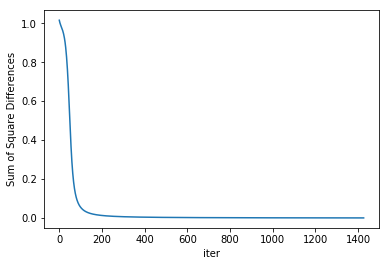

In [40]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(SSD))), SSD)
plt.xlabel("iter")
plt.ylabel("Sum of Square Differences")